In [ ]:
### requires scikit-learn>=1.3 for HDBSCAN

In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import skew, kurtosis, norm
from sklearn.cluster import DBSCAN, HDBSCAN
%matplotlib inline

In [2]:
skews = np.load('/datax/scratch/benjb/skewnesses.npz')['arr_0']
kurts = np.load('/datax/scratch/benjb/kurtoses.npz')['arr_0']
sarles = np.load('/datax/scratch/benjb/sarles.npz')['arr_0']
corrs = np.load('/datax/scratch/benjb/corrs.npz')['arr_0']
tbws = np.load('/datax/scratch/benjb/tbws.npz')['arr_0']

In [91]:
lfiles = ['/datag/pipeline/AGBT19B_999_121/blc73_blp03/blc73_guppi_58832_16209_MESSIER031_0057.gpuspec.0000.h5',
'/datag/pipeline/AGBT19B_999_121/blc73_blp03/blc73_guppi_58832_16530_HIP2792_0058.gpuspec.0000.h5',
'/datag/pipeline/AGBT19B_999_121/blc73_blp03/blc73_guppi_58832_16851_MESSIER031_0059.gpuspec.0000.h5',
'/datag/pipeline/AGBT19B_999_121/blc73_blp03/blc73_guppi_58832_17168_HIP3077_0060.gpuspec.0000.h5',
'/datag/pipeline/AGBT19B_999_121/blc73_blp03/blc73_guppi_58832_17485_MESSIER031_0061.gpuspec.0000.h5',
'/datag/pipeline/AGBT19B_999_121/blc73_blp03/blc73_guppi_58832_17801_HIP3223_0062.gpuspec.0000.h5']

filename = '/datax/scratch/benjb/m31_l_data/' + lfiles[0][44:-2] + 'dat'

df0 = pd.read_table(filename, sep='\s+', names=['Top_Hit_#','Drift_Rate','SNR','Uncorrected_Frequency','Corrected_Frequency',
                                            'Index', 'freq_start', 'freq_end', 'SEFD', 'SEFD_freq', 'Coarse_Channel_Number', 
                                            'Full_number_of_hits'], skiprows=9)

freqs = df0['freq_start'].values
drifts = df0['Drift_Rate'].values
snrs = df0['SNR'].values

<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:10: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_2131849/672101961.py:10: SyntaxWarning: invalid escape sequence '\s'
  df0 = pd.read_table(filename, sep='\s+', names=['Top_Hit_#','Drift_Rate','SNR','Uncorrected_Frequency','Corrected_Frequency',


In [199]:
data_arr = np.array([freqs/np.max(freqs), 
                     drifts/np.max(drifts), 
                     np.log10(snrs)/np.max(np.log10(snrs)), 
                     np.log10(np.abs(skews))/np.max(np.log10(np.abs(skews))), 
                     np.log10(kurts)/np.max(np.log10(kurts)), 
                     sarles, 
                     corrs, 
                     np.log10(tbws*1e6)/np.max(np.log10(tbws*1e6))
                     ])  ### PRE-PROCESSED FOR HDBSCAN

data_arr_unscaled = np.array([freqs, 
                     drifts, 
                     snrs, 
                     np.abs(skews), 
                     kurts, 
                     sarles, 
                     corrs, 
                     tbws*1e6
                     ])

df = pd.DataFrame(np.transpose(data_arr),
                   columns=['frequency [MHz]', 'drift rate [Hz/s]', 'log10 SNR', 'log10 magnitude of skewness', 'log10 kurtosis', 'Sarle\'s coefficient', 'correlation coefficient [kurtosis vs. log(bandwidth)]', 'log10 turning-point bandwidth [Hz]'])

dfu = pd.DataFrame(np.transpose(data_arr_unscaled),
                   columns=['frequency [MHz]', 'drift rate [Hz/s]', 'SNR', 'magnitude of skewness', 'kurtosis', 'Sarle\'s coefficient', 'correlation coefficient [kurtosis vs. log(bandwidth)]', 'turning-point bandwidth [Hz]'])

In [142]:
dfu

,frequency [MHz],drift rate [Hz/s],SNR,log magnitude of skewness,log kurtosis,Sarle's coefficient,correlation coefficient [kurtosis vs. log(bandwidth)],log turning-point bandwidth [Hz]
0,1681.555894,0.040817,1.118204,0.933178,2.113628,0.573581,0.988526,3.671281
1,1681.542103,0.030613,1.090525,0.824428,1.941385,0.521328,0.983897,4.454282
2,1681.533109,0.040817,1.165873,0.817321,1.857181,0.612942,0.979939,4.209594
3,1681.528309,0.030613,1.418244,1.103513,2.307178,0.798978,0.972087,3.915969
4,1681.519315,0.040817,1.068397,0.779976,1.937509,0.430768,0.994260,4.698970
...,...,...,...,...,...,...,...,...
3063,1526.027322,-0.010204,1.968076,0.994037,2.106720,0.768769,0.601945,4.552157
3064,1526.019996,0.010204,1.781814,1.123498,2.390542,0.722615,0.976564,4.503220
3065,1525.987760,-0.020409,1.004278,1.090013,2.313783,0.739780,0.936394,4.650032
3066,1521.501754,-0.010204,1.702775,1.484026,2.973857,0.987783,0.948657,4.698970


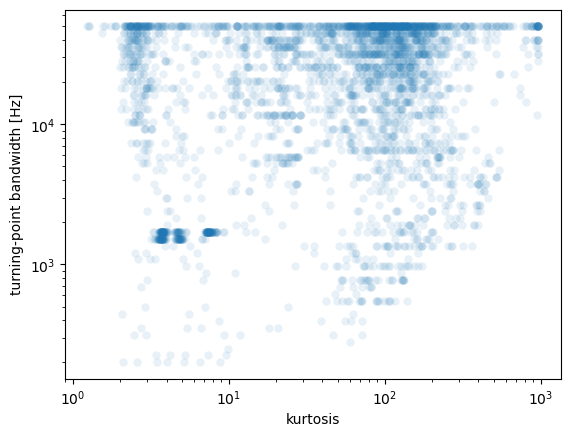

In [21]:
p1 = 'kurtosis'
p2 = 'turning-point bandwidth [Hz]'
plt.scatter(df[p1].values, df[p2].values, alpha=0.1, linewidths=0)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(p1)
plt.ylabel(p2)
plt.show()

In [22]:
centers = [[1, 1], [-1, -1], [1.5, -1.5]]

from sklearn.datasets import make_blobs
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=[0.4, 0.1, 0.75], random_state=0
)

print(X)

[[ 0.84022039  1.14802236]
 [-1.03868708 -1.05102927]
 [ 0.67863613  0.72418009]
 ...
 [ 0.12747859 -2.02187634]
 [-0.97157203 -0.82573312]
 [ 0.7508634  -2.05510259]]


Fitting ...
Making labels ...
Scattering ...
Refining ...


/tmp/ipykernel_2131849/764598378.py:47: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for lh in leg.legendHandles:


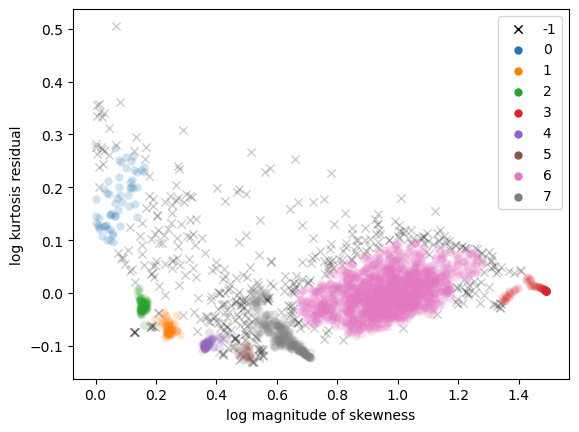

In [70]:
hdb = HDBSCAN(min_cluster_size=20, min_samples=20)

cut = 1

coef = np.polyfit(np.log10(np.abs(skews)[np.where(np.abs(skews) > cut)[0]]), np.log10(kurts[np.where(np.abs(skews) > cut)[0]]), 1)
poly1d_fn = np.poly1d(coef)

xunsorted = np.abs(skews)[np.where(np.abs(skews) > cut)[0]]
xmodunsorted = np.log10(xunsorted)
ymodunsorted = poly1d_fn(xmodunsorted)
yunsorted = 10**ymodunsorted

x = np.log10(np.abs(skews)[np.where(np.abs(skews) > cut)[0]])
y = np.log10(kurts[np.where(np.abs(skews) > cut)[0]]) - ymodunsorted

print('Fitting ...')

X = np.transpose(np.array([x, y]))
hdb.fit(X)

#labels = hdb.labels_
print('Making labels ...')
labels_list = hdb.labels_
labels = np.unique(labels_list)
#print(labels)

print('Scattering ...')
for l in labels:
    idxs = np.where(labels_list == l)
    #print(idxs)
    if l == -1.:
        plt.scatter(x[idxs], y[idxs], color='k', marker='x', alpha=0.2, linewidths=1, label=l)
    else:
        plt.scatter(x[idxs], y[idxs], alpha=0.2, linewidths=0, label=l)

print('Refining ...')

#plt.xscale('log')
#plt.yscale('log')
#plt.xlabel('skewness')
#plt.ylabel('kurtosis')

plt.xlabel('log magnitude of skewness')
plt.ylabel('log kurtosis residual')

leg = plt.legend()
for lh in leg.legendHandles: 
    lh.set_alpha(1)

plt.show()

Fitting ...
Making labels ...
Scattering ...
Refining ...


/tmp/ipykernel_2131849/3448131167.py:52: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for lh in leg.legendHandles:


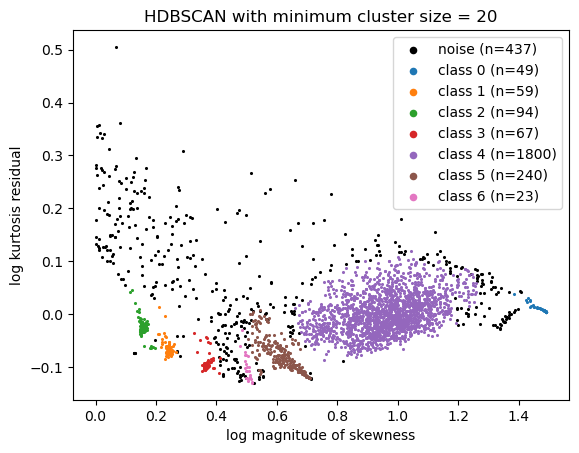

In [102]:
nmincluster = 20
hdb = HDBSCAN(min_cluster_size=nmincluster, min_samples=nmincluster)

cut = 1

coef = np.polyfit(np.log10(np.abs(skews)[np.where(np.abs(skews) > cut)[0]]), np.log10(kurts[np.where(np.abs(skews) > cut)[0]]), 1)
poly1d_fn = np.poly1d(coef)

xunsorted = np.abs(skews)[np.where(np.abs(skews) > cut)[0]]
xmodunsorted = np.log10(xunsorted)
ymodunsorted = poly1d_fn(xmodunsorted)
yunsorted = 10**ymodunsorted

x = np.log10(np.abs(skews)[np.where(np.abs(skews) > cut)[0]])
y = np.log10(kurts[np.where(np.abs(skews) > cut)[0]]) - ymodunsorted

#x = np.abs(skews)[np.where(np.abs(skews) > cut)[0]]
#y = kurts[np.where(np.abs(skews) > cut)[0]]

print('Fitting ...')

X = np.transpose(np.array([x, y+ymodunsorted]))
hdb.fit(X)

#labels = hdb.labels_
print('Making labels ...')
labels_list = hdb.labels_
labels = np.unique(labels_list)
#print(labels)

print('Scattering ...')
for l in labels:
    idxs = np.where(labels_list == l)[0]
    #print(idxs)
    if l == -1.:
        plt.scatter(x[idxs], y[idxs], color='k', s=5, linewidths=0, label=f'noise (n={len(idxs)})')
    else:
        plt.scatter(x[idxs], y[idxs], s=5, linewidths=0, label=f'class {l} (n={len(idxs)})')

print('Refining ...')

#plt.xscale('log')
#plt.yscale('log')
#plt.xlabel('skewness')
#plt.ylabel('kurtosis')

plt.xlabel('log magnitude of skewness')
plt.ylabel('log kurtosis residual')
plt.title(f'HDBSCAN with minimum cluster size = {nmincluster}')

leg = plt.legend()
for lh in leg.legendHandles: 
    lh.set_alpha(1)
    lh.set_sizes([30])

plt.show()

In [147]:
for ii, name in enumerate(dfu.columns):
    print(f'{ii}: {name}')

0: frequency [MHz]
1: drift rate [Hz/s]
2: SNR
3: log magnitude of skewness
4: log kurtosis
5: Sarle's coefficient
6: correlation coefficient [kurtosis vs. log(bandwidth)]
7: log turning-point bandwidth [Hz]


In [162]:
print(dfu[dfu.columns[4]].values.min())

1.2401470048599603


Making labels ...
16
Scattering ...
Refining ...


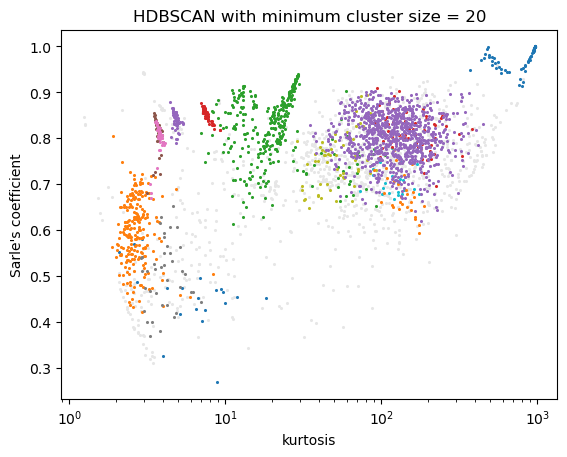

In [214]:
nmincluster = 20
col_idx_x = 4
col_idx_y = 5

hdb = HDBSCAN(min_cluster_size=nmincluster, min_samples=2)

X = np.transpose(data_arr)
hdb.fit(X)

print('Making labels ...')
labels_list = hdb.labels_
labels = np.unique(labels_list)
print(len(labels))

x_param = dfu.columns[col_idx_x]
y_param = dfu.columns[col_idx_y]

x = dfu[x_param].values
y = dfu[y_param].values

print('Scattering ...')
for l in labels:
    idxs = np.where(labels_list == l)[0]
    if l == -1.:
        plt.scatter(x[idxs], y[idxs], color='0.9', s=5, linewidths=0, label=f'noise (n={len(idxs)})')
    else:
        plt.scatter(x[idxs], y[idxs], s=5, linewidths=0, label=f'class {l} (n={len(idxs)})')

print('Refining ...')

if 'log10' in df.columns[col_idx_x]:
    plt.xscale('log')
else:
    plt.xscale('linear')
if 'log10' in df.columns[col_idx_y]:
    plt.yscale('log')
else:
    plt.yscale('linear')

plt.xlabel(x_param)
plt.ylabel(y_param)
plt.title(f'HDBSCAN with minimum cluster size = {nmincluster}')

#leg = plt.legend()
#for lh in leg.legendHandles: 
#    lh.set_alpha(1)
#    lh.set_sizes([30])

plt.show()

In [164]:
np.savez('/datax/scratch/benjb/hdbscan_labels_20.npz', labels_list)